In [107]:
from sportsipy.nfl.teams import Teams
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline

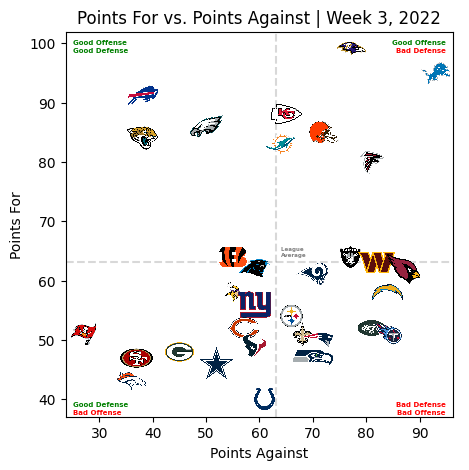

In [108]:
dimensions = (5, 5)
fig, ax = plt.subplots(figsize = dimensions)

#create a data frame with 3 columns: team name, points against, and points for. 
#32 rows for each team and their respective information. 
teams = []
points_for = []
points_against = []
for team in Teams('2022'):
    teams.append(team.abbreviation)
    points_for.append(team.points_for)
    points_against.append(team.points_against)
d = {"Team" : teams, "Points Against" : points_against, "Points For" : points_for}
df = pd.DataFrame(d)

#create graph
graph = sns.scatterplot(ax = ax, x = "Points Against", y = "Points For", data = df, s = 0)

#Image function, iterates through team name in data frame and adds team image at its coordinates. 
def images(dfname, xcol, ycol, graph_name):
    for team in dfname["Team"]:
        arr_img = plt.imread(team + ".png")
        imagebox = OffsetImage(arr_img, zoom = 0.033)
        ab = AnnotationBbox(imagebox, [(dfname.loc[dfname[dfname["Team"]==team].index.values][xcol]), 
                                    (dfname.loc[dfname[dfname["Team"]==team].index.values][ycol])], frameon = False)
        graph_name.add_artist(ab)

#these two variables are to easily add the dotted lines
league_avg_for = 0
for value in df["Points For"]:
    league_avg_for += value/32

league_avg_against = 0
for value in df["Points Against"]:
    league_avg_against += value/32

#annotations
plt.axvline(x = league_avg_against, ls = '--', color = "gray", alpha = 0.3)
plt.axhline(y = league_avg_for, ls = '--', color = "gray", alpha = 0.3)
plt.text(0.02, 0.98, "Good Offense", horizontalalignment = "left", verticalalignment = "top"
         , size = 5, color = "green", weight = "semibold", transform = ax.transAxes)
plt.text(0.02, 0.96, "Good Defense", horizontalalignment = "left", verticalalignment = "top"
         , size = 5, color = "green", weight = "semibold", transform = ax.transAxes)
plt.text(0.98, 0.98, "Good Offense", horizontalalignment = "right", verticalalignment = "top"
         , size = 5, color = "green", weight = "semibold", transform = ax.transAxes)
plt.text(0.98, 0.96, "Bad Defense", horizontalalignment = "right", verticalalignment = "top"
         , size = 5, color = "red", weight = "semibold", transform = ax.transAxes)
plt.text(0.02, 0.02, "Bad Offense", horizontalalignment = "left", verticalalignment = "top"
         , size = 5, color = "red", weight = "semibold", transform = ax.transAxes)
plt.text(0.02, 0.04, "Good Defense", horizontalalignment = "left", verticalalignment = "top"
         , size = 5, color = "green", weight = "semibold", transform = ax.transAxes)
plt.text(0.98, 0.02, "Bad Offense", horizontalalignment = "right", verticalalignment = "top"
         , size = 5, color = "red", weight = "semibold", transform = ax.transAxes)
plt.text(0.98, 0.04, "Bad Defense", horizontalalignment = "right", verticalalignment = "top"
         , size = 5, color = "red", weight = "semibold", transform = ax.transAxes)
plt.text(league_avg_for + 1, league_avg_against + 1, "League \nAverage", size = 4, color = "gray", weight = "semibold")

#add images
images(df, "Points Against", "Points For", graph)

ax.set_title("Points For vs. Points Against | Week 3, 2022")
plt.savefig("Points For vs. Points Against Week 3 2022.png", dpi = 500)